In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Reshape, Conv2DTranspose, UpSampling2D,
    BatchNormalization, Dropout, LeakyReLU
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler


In [2]:
gpus = tf.config.list_physical_devices('GPU')

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [3]:
model = Sequential([
    # Convolutional Block 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    # Convolutional Block 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    # Convolutional Block 3
    Conv2D(64, (3, 3), activation='relu'),
    # Flatten and Fully Connected     
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])


model.summary()


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, epochs=50, 
                    shuffle=True,
                    validation_split=0.4, 
                    batch_size=2048)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [4]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.0664 - accuracy: 0.6262


[1.0664206743240356, 0.6262000203132629]

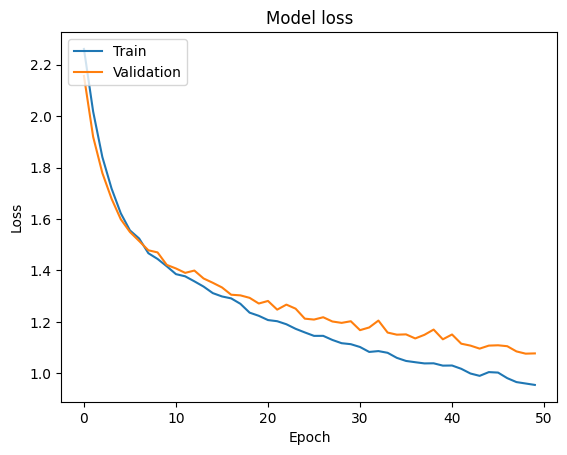

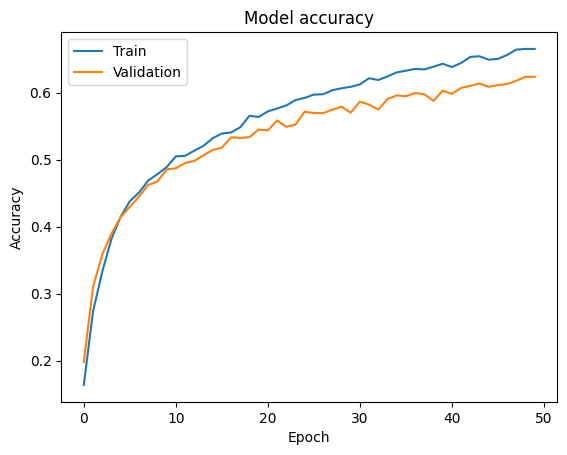

In [5]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()